<a href="https://colab.research.google.com/github/dohyeonYoon/ObjectDetection/blob/main/dogsandcats_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


Read data

In [ ]:
import pathlib
data_dir = '/content/MyDrive/MyDrive/Colab Notebooks/dogsandcats'
data_dir = pathlib.Path(data_dir)


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

84


Make train **data** set

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  seed = 1,
  batch_size=batch_size)

Found 84 files belonging to 2 classes.
Using 68 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
   seed = 1,
  batch_size=batch_size)

Found 84 files belonging to 2 classes.
Using 16 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


Plot images

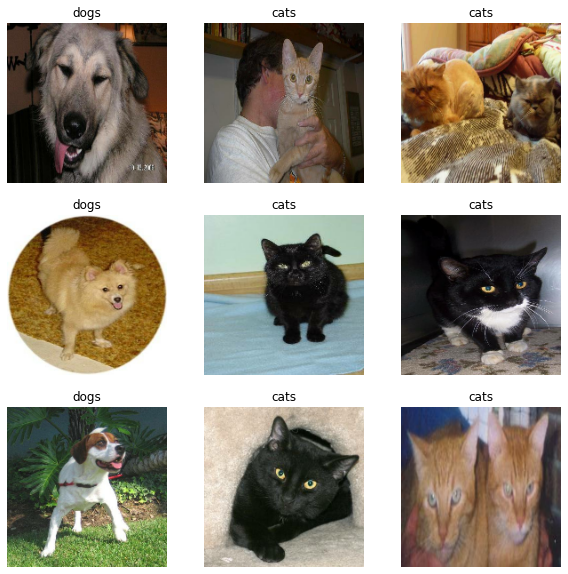

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Create Model

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

Training

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
3/3 [==============================] - 0s 56ms/step - loss: 0.3818 - accuracy: 0.8971 - val_loss: 0.9089 - val_accuracy: 0.3750
Epoch 2/100
3/3 [==============================] - 0s 52ms/step - loss: 0.3150 - accuracy: 0.8824 - val_loss: 1.3151 - val_accuracy: 0.3125
Epoch 3/100
3/3 [==============================] - 0s 56ms/step - loss: 0.3412 - accuracy: 0.8235 - val_loss: 0.8960 - val_accuracy: 0.5625
Epoch 4/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2211 - accuracy: 0.9706 - val_loss: 1.0740 - val_accuracy: 0.3750
Epoch 5/100
3/3 [==============================] - 0s 52ms/step - loss: 0.1972 - accuracy: 0.9853 - val_loss: 1.0042 - val_accuracy: 0.4375
Epoch 6/100
3/3 [==============================] - 0s 58ms/step - loss: 0.1428 - accuracy: 1.0000 - val_loss: 1.4311 - val_accuracy: 0.3125
Epoch 7/100
3/3 [==============================] - 0s 54ms/step - loss: 0.1485 - accuracy: 0.9706 - val_loss: 1.0695 - val_accuracy: 0.6875
Epoch 8/100
3/3 [===

Train Results

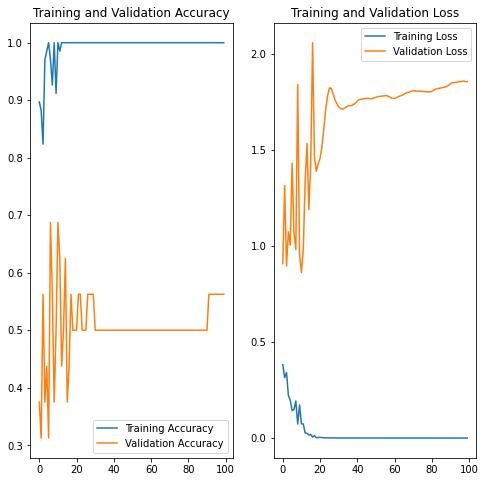

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_img = '/content/MyDrive/MyDrive/Colab Notebooks/test.jpg'
test_img = pathlib.Path(test_img)

img = keras.preprocessing.image.load_img(
    test_img, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to dogs with a 100.00 percent confidence.


In [ ]:
test_img = '/content/MyDrive/MyDrive/Colab Notebooks/test2.jpg'
test_img = pathlib.Path(test_img)

img = keras.preprocessing.image.load_img(
    test_img, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to cats with a 99.99 percent confidence.
